         Date  Open Price  High Price  Low Price  Close Price     Volume  year
0  1999-11-01       80.00       80.69      77.37        77.62  2487300.0  1999
1  1999-11-02       78.00       81.69      77.31        80.25  3564600.0  1999
2  1999-11-03       81.62       83.25      81.00        81.50  2932700.0  1999
3  1999-11-04       82.06       85.37      80.62        83.62  3384700.0  1999
4  1999-11-05       84.62       88.37      84.00        88.31  3721500.0  1999

Statistics for Open Price:
Mean: 174.0486
Standard Deviation: 147.3366
Skewness: 1.4483
Kurtosis: 1.6131

Statistics for Close Price:
Mean: 174.0582
Standard Deviation: 147.2729
Skewness: 1.4457
Kurtosis: 1.6034

Statistics for Low Price:
Mean: 172.0226
Standard Deviation: 145.9228
Skewness: 1.4476
Kurtosis: 1.6097

Statistics for High Price:
Mean: 175.9766
Standard Deviation: 148.5515
Skewness: 1.4451
Kurtosis: 1.6008

Correlation Matrix:
             Open Price  Close Price  Low Price  High Price
Open Price     1.0000

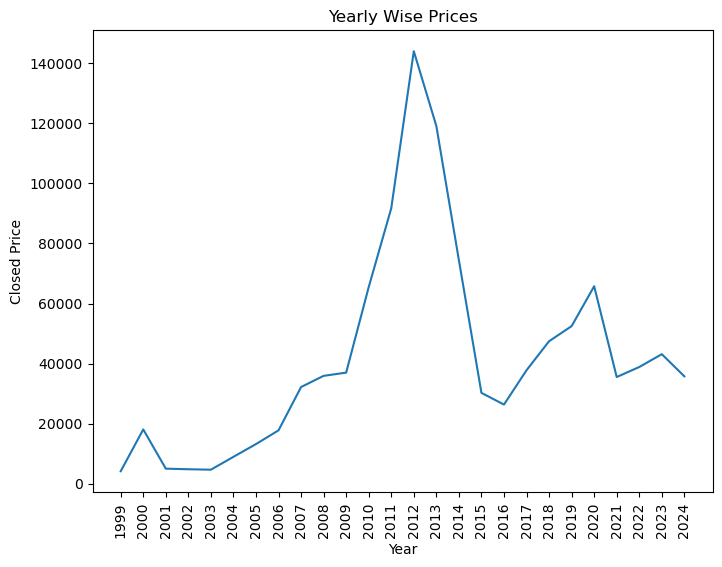

year
1999    1.610995e+08
2000    1.672582e+09
2001    1.690318e+09
2002    1.375249e+09
2003    1.271969e+09
2004    2.175030e+09
2005    5.672228e+09
2006    7.703534e+09
2007    8.821285e+09
2008    1.021361e+10
2009    5.116203e+09
2010    5.393747e+09
2011    4.430691e+09
2012    4.713007e+09
2013    3.657913e+09
2014    8.734012e+09
2015    1.306432e+10
2016    9.685872e+09
2017    6.687213e+09
2018    8.467093e+09
2019    7.086568e+09
2020    1.855258e+10
2021    2.279835e+10
2022    2.205019e+10
2023    1.480489e+10
2024    1.132280e+10
Name: Volume, dtype: float64


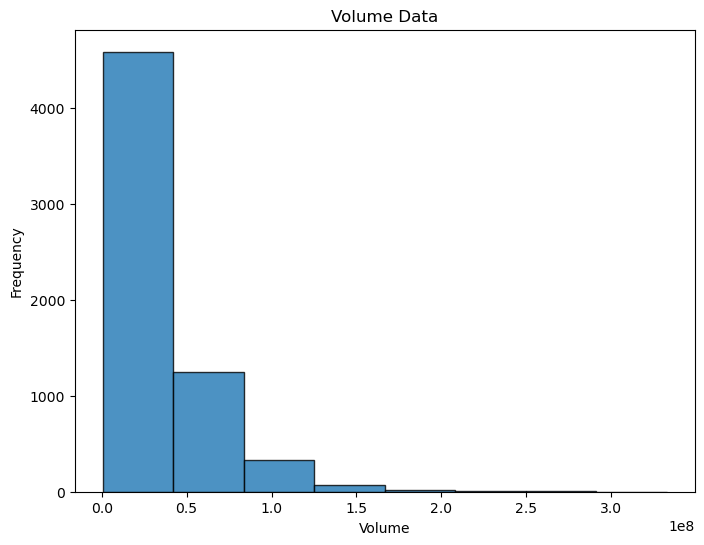

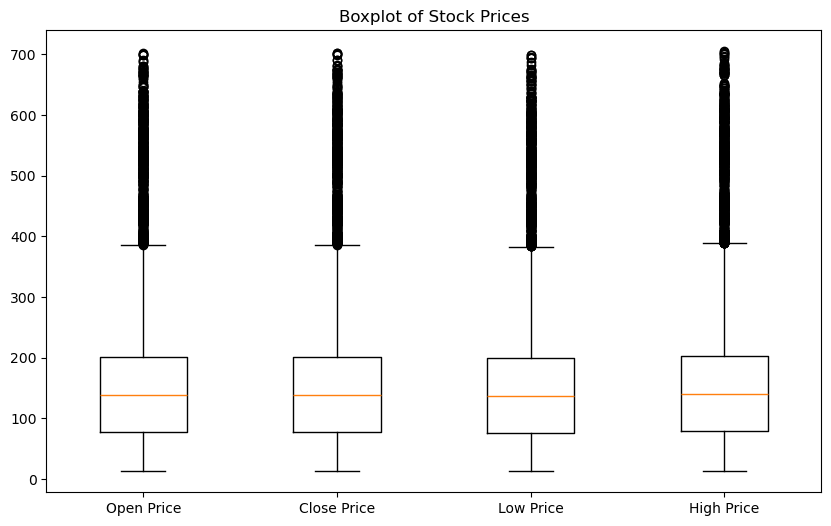

In [23]:

#Statistics and Trends Assignment

#author@ : Chandrasekhar Kolli

# Importing the packages
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

def load_data(file_path):
    """
    Load stock price data from a CSV file into a DataFrame.
    
    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the stock price data.
    """
    df = pd.read_csv(file_path)
    df['year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')
    return df

def calculate_statistics(df, price_columns):
    """
    Calculate mean, standard deviation, skewness, and kurtosis for specified price columns.

    Args:
        df (pd.DataFrame): DataFrame containing the stock price data.
        price_columns (list): List of columns for which to calculate statistics.

    Returns:
        dict: A dictionary with statistical measures for each price column.
    """
    statistics = {}
    for column in price_columns:
        statistics[column] = {
            'Mean': df[column].mean(),
            'Standard Deviation': df[column].std(),
            'Skewness': skew(df[column]),
            'Kurtosis': kurtosis(df[column])
        }
    return statistics

def print_statistics(statistics):
    """
    Print calculated statistics for price columns.

    Args:
        statistics (dict): A dictionary of statistics for each price column.
    """
    for column, stats in statistics.items():
        print(f"\nStatistics for {column}:")
        for stat_name, value in stats.items():
            print(f"{stat_name}: {value:.4f}")

def plot_yearly_prices(data):
    """
    Plot a line graph of yearly closing prices.

    Args:
        data (pd.Series): Series containing yearly closing prices.
    """
    plt.figure(figsize=(8, 6))
    x = data.index
    y = data.values
    plt.plot(x, y)
    plt.title("Yearly Wise Prices")
    plt.xlabel("Year")
    plt.ylabel("Closed Price")
    plt.xticks(rotation=90)
    plt.show()

def plot_volume_histogram(df):
    """
    Plot a histogram of the volume data.

    Args:
        df (pd.DataFrame): DataFrame containing the stock price data.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(df['Volume'], bins=8, edgecolor='black', alpha=0.8)
    plt.title('Volume Data')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(df, price_columns):
    """
    Plot a boxplot for specified price columns.

    Args:
        df (pd.DataFrame): DataFrame containing the stock price data.
        price_columns (list): List of columns to plot in the boxplot.
    """
    overall_data = [df[column] for column in price_columns]
    plt.figure(figsize=(10, 6))
    plt.boxplot(overall_data)
    plt.xticks(range(1, len(price_columns) + 1), price_columns)
    plt.title("Boxplot of Stock Prices")
    plt.show()

def main():
    """
    Main function to execute the data analysis and visualization workflow.
    """
    # Load the data
    df = load_data('AAPL_stock_price.csv')
    
    # Display the first few rows of the DataFrame
    print(df.head())

    # Calculate statistics for price columns
    price_columns = ['Open Price', 'Close Price', 'Low Price', 'High Price']
    statistics = calculate_statistics(df, price_columns)
    print_statistics(statistics)

    # Display the correlation matrix
    correlation_matrix = df[price_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Get basic statistics using describe
    basic_stats = df[price_columns].describe()
    print("\nBasic Statistics (Describe):")
    print(basic_stats)

    # Group the DataFrame by the 'year' column and calculate the sum of the 'Close Price' for each year
    data = df.groupby('year')["Close Price"].sum()
    plot_yearly_prices(data)

    # Group the DataFrame by the 'year' column and calculate the sum of the 'Volume' for each year
    volume_data = df.groupby('year')["Volume"].sum()
    print(volume_data)  # Print the yearly volume sums
    plot_volume_histogram(df)

    # Plot the boxplot for the price columns
    plot_boxplot(df, price_columns)

# Run the main function
if __name__ == "__main__":
    main()



